# Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dataframe_image as dfi

In [2]:
# import data, with all columns with string data type, for now
data = pd.read_csv('data.csv', dtype='str')
data.head()

,event_id,event_timestamp,page_title,organization_id,user_id
0,ajs-51c205dff7f3f3541943fc69498875cc,2020-01-02T11:47:43.710Z,Welcome,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695
1,ajs-e49668e966f11460a35c70e9cab9edcd,2020-01-02T11:48:07.142Z,Welcome,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695
2,ajs-0aedceadad5d3d4f8ec2367bd4230c39,2020-01-02T11:48:16.099Z,Job position,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695
3,ajs-90802aefaa8f58920c8dfcce19304fad,2020-01-05T16:30:59.842Z,Job position,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695
4,ajs-8354ae15e8bbe83e06efc759737c0932,2020-01-05T16:31:04.477Z,All job positions,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695


In [3]:
# no duplicates
size = data.groupby(['event_timestamp', 'page_title', 'organization_id', 'user_id'],as_index=False).size()
size['size'].unique()

array([1], dtype=int64)

In [4]:
# Null values check
data.isnull().sum()

event_id           0
event_timestamp    0
page_title         0
organization_id    0
user_id            0
dtype: int64

In [5]:
data.dtypes

event_id           object
event_timestamp    object
page_title         object
organization_id    object
user_id            object
dtype: object

In [6]:
# change data type to time stamp in 'event_timestamp'
data['event_timestamp'] = data['event_timestamp'].astype('datetime64[s]')

In [7]:
# save image of table for presentation
data.head()
dfi.export(data.head(), 'tables/table1.png')

In [8]:
data.describe(include='all', datetime_is_numeric=True)

,event_id,event_timestamp,page_title,organization_id,user_id
count,41345,41345,41345,41345,41345
unique,41345,NaN,4,34,743
top,ajs-67f8d5485f93a1123786c12caa01b6db,NaN,Candidate page,b5753677-126d-4aad-8a7f-913210717f24,9a6d6f98-35dc-480a-be28-c92ed739bb03
freq,1,NaN,15575,4800,2580
mean,NaN,2020-08-10 22:17:45.203652352,NaN,NaN,NaN
min,NaN,2020-01-02 11:47:43,NaN,NaN,NaN
25%,NaN,2020-05-20 06:51:36,NaN,NaN,NaN
50%,NaN,2020-09-07 14:02:01,NaN,NaN,NaN
75%,NaN,2020-11-05 09:56:43,NaN,NaN,NaN
max,NaN,2020-12-31 12:13:04,NaN,NaN,NaN


In [9]:
for page in data['page_title'].unique():
    print(page)

Welcome
Job position
All job positions
Candidate page


In [10]:
# are users belonging to more than one organization?
org_per_user =  pd.DataFrame(data.groupby('user_id')['organization_id'].nunique().sort_values()).reset_index()
org_per_user['organization_id'].unique() # no 

array([1], dtype=int64)

In [11]:
# how many users per organization we have (yearly)
users_per_org =  pd.DataFrame(data.groupby('organization_id')['user_id'].nunique().sort_values()).reset_index()
users_per_org = users_per_org.rename(columns={'user_id': 'N users in 2020'})
users_per_org  

,organization_id,N users in 2020
0,e1999767-9424-4ca3-9d67-17702aefe953,1
1,2628aac3-054b-4bbb-8e83-db6c8ac867f5,1
2,1a3672b1-bd62-4ad1-abbb-3bcafe0cadaf,2
3,3b5e6b24-2b66-4384-a7e5-cc92ef0d8eb4,2
4,f498e205-f31a-4cb8-bbf8-139975ebd28b,3
5,1773a1a3-031f-4879-a635-9999ea621d63,3
6,db19997b-9bab-46ea-96b7-474bbe927b73,3
7,728c5804-e9ce-46ba-b78a-01be6568448c,3
8,1a1ea75a-d6c4-4da5-b4ab-99706ce3d078,4
9,1ed2f209-30b3-4dd5-96eb-2b50f63084c1,4


In [12]:
users_per_org['N users in 2020'].values.mean()

21.852941176470587

In [13]:
np.median(users_per_org['N users in 2020'].values)

11.0

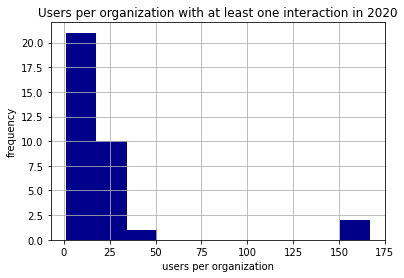

In [14]:
# plot users per organization
users_per_org.hist(color = 'darkblue')
plt.title('Users per organization with at least one interaction in 2020')
plt.ylabel('frequency')
plt.xlabel('users per organization')
plt.savefig('figures/0/1_users_per_org', bbox_inches='tight')
plt.show()

In [15]:
# number of interactions per user
inter_per_user =  pd.DataFrame(data.groupby('user_id')['event_id'].count().sort_values()).reset_index()
inter_per_user = inter_per_user.rename(columns={'event_id': 'N interactions'})
inter_per_user.head()

,user_id,N interactions
0,80e8e2cc-09ae-4768-914f-5524e37e2584,1
1,253888ab-6af8-4a80-8f27-dd6f18c298f6,1
2,54fe450a-7774-4fa3-85b3-76a8365a72db,1
3,937c9a3c-a0c5-436c-8e88-6f147fa7aa18,1
4,22fce5e7-b9dc-4990-b4b1-bbe0639971f0,1


In [16]:
inter_per_user['N interactions'].values.mean()

55.646029609690444

In [17]:
np.median(inter_per_user['N interactions'].values)

7.0

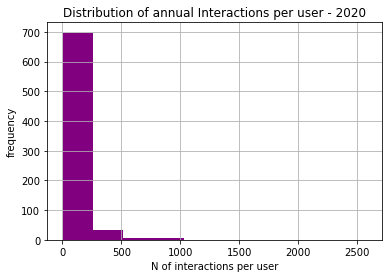

In [18]:
# plot number of interactions
inter_per_user['N interactions'].hist(color = 'purple')
plt.title('Distribution of annual Interactions per user - 2020')
plt.ylabel('frequency')
plt.xlabel('N of interactions per user')
plt.savefig('figures/0/2_interactions_per_user', bbox_inches='tight')
plt.show()

In [19]:
# Total number of interactions per page
inter_per_page =  pd.DataFrame(data.groupby('page_title')['event_id'].count().sort_values()).reset_index()
inter_per_page = inter_per_page.rename(columns={'event_id': 'N interactions'})
inter_per_page

,page_title,N interactions
0,All job positions,2432
1,Welcome,10718
2,Job position,12620
3,Candidate page,15575


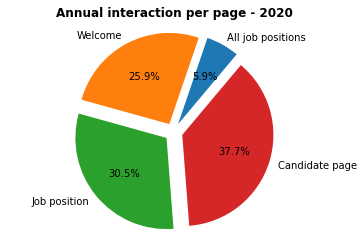

In [20]:
# Pie chart
labels = inter_per_page['page_title'].values
sizes = inter_per_page['N interactions'].values
explode = (0.1, 0.1, 0.1, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=50)
ax1.axis('equal')
plt.title(label = 'Annual interaction per page - 2020',fontweight= 'bold')
plt.savefig('figures/0/3_interactions_per_page', bbox_inches='tight')

plt.show()

Comments:
* There are no null values in this data set
* Events are unique $\rightarrow$ no duplicates
* The data belong to the year 2020, from 2/Jan to 31/Dec
* There are 4 categories of page_title
* The data belong to 34 organizations and 743 users
* No users are belonging to more than one organization
* The number of users per organization varies between 167, this analysis counts as a user belonging to a company when a user did at least one interaction with the product in a year